Лабораторная работа 1.3.3

In [14]:
%matplotlib inline

In [15]:
from matplotlib import pyplot as plt
import numpy as np
from math import log, sqrt, pi

In [16]:
# const
n_p = 0.2 * 9.81
d_1 = 4.1e-3
sigma_d_1 = 0.05e-3
sigma_d_2 = 0.1e-3
sigma_d_3 = 0.05e-3
sigma_d = [sigma_d_1, sigma_d_2, sigma_d_3] 
sigma_t = 0.2 * 2
sigma_p_1 = n_p * 0.5
sigma_p_2 = n_p * 2
sigma_V = 0.01
d = np.array([4.1, 3, 5.2]) * 1e-3

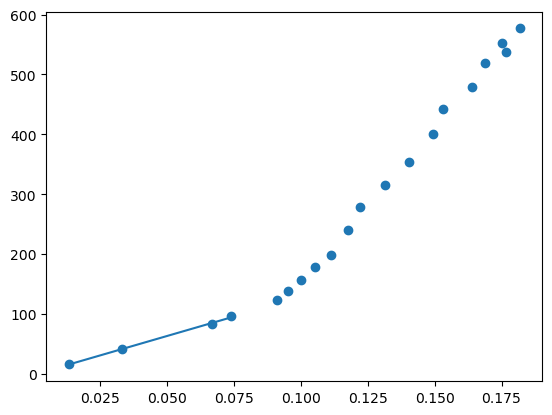

In [17]:
# Зависимость разности давленийа от расхода,  эксперимент на трубе 1 с d_1 = 4.1 +- 0.5 mm 

# Разность давлений
n_1 = np.array([8, 21, 42, 49, 63, 70, 80, 91, 101, 122, 142, 161, 180, 204, 225, 244, 265, 274, 282, 294])
delta_p_1 = n_1 * n_p

# Расход
V_1 = np.array([1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])  # Литры
t_1 = np.array([75, 30, 15, 27, 22, 21, 20, 19, 18, 17, 16.37, 15.22, 14.25, 13.40, 13.06, 12.19, 
                    11.85, 11.32, 11.41, 11.00])
Q_1 = V_1 / t_1

epsilon_V_1 = sigma_V / V_1
epsilon_t_1 = sigma_t / t_1
epsilon_Q_1 = []

for i in range(len(V_1)):
    epsilon_Q_1.append(sqrt(epsilon_V_1[i] ** 2 + epsilon_t_1[i] ** 2))

epsilon_Q_1_np = np.array(epsilon_Q_1)

sigma_Q = epsilon_Q_1_np * Q_1

plt.scatter(Q_1, delta_p_1)

Q_1_laminar = Q_1[0:4]        # x
P_1_laminar = delta_p_1[0:4]  # y

k_1 = (np.mean(Q_1_laminar * P_1_laminar) - np.mean(Q_1_laminar) *
       np.mean(P_1_laminar)) / (np.mean(Q_1_laminar ** 2) - np.mean(Q_1_laminar) ** 2)
b_1 = np.mean(P_1_laminar) - k_1 * np.mean(Q_1_laminar)

sigma_k_1 = sqrt(((np.mean(P_1_laminar ** 2) - np.mean(P_1_laminar) **
                  2) / (np.mean(Q_1_laminar ** 2) - np.mean(Q_1_laminar) ** 2)) - 
                 k_1) / sqrt(len(P_1_laminar))

sigma_b_1 = b_1 * sqrt((np.mean(Q_1_laminar ** 2) - np.mean(Q_1_laminar) ** 2))

plt.plot(Q_1_laminar, k_1 * Q_1_laminar + b_1)

Q_1_laminar_real = Q_1[0:4] * 1e-3

k_1_real = k_1 * 1e3

n_1 = k_1_real * ((0.5 * d[1]) ** 4) * pi / 8 / 0.5

In [18]:
print(n_1)

5.160623855658126e-06


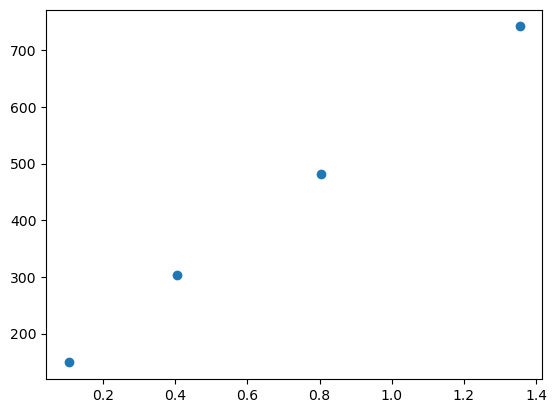

In [19]:
# Распределение давлений по трубе
l_2 = np.array([10.5, 30, 40, 50]) * 1e-2
delta_p_2 = np.array([76, 79, 90, 113]) * n_p

L_2 = np.array([10.5, 40.5, 80.5, 135.5]) * 1e-2
P_2 = np.array([76, 76 + 79, 90 + 76 + 79, 133 + 90 + 76 + 79]) * n_p

plt.scatter(L_2, P_2)

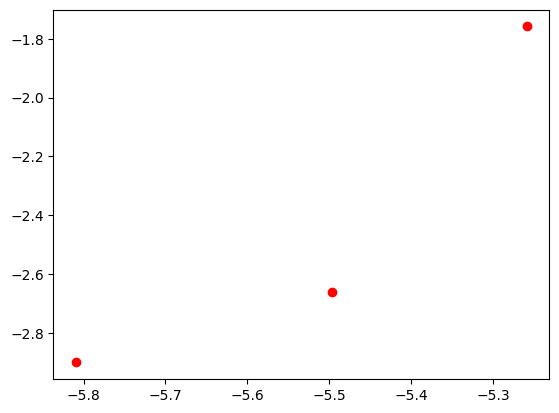

In [20]:
# Зависимость расхода от радиуса

delta_P_1 = 47.5 * n_p 
L = np.array([50, 30, 50]) * 1e-2
dP_dL = delta_P_1 / L[1]
delta_P_3 = delta_p_1
delta_P_2 = dP_dL * L[1]
V = np.array([2, 2, 2]) #  Литры
t = np.array([28.65, 36.38, 11.6])

Q = V / t

epsilon_t = sigma_t / t
epsilon_V = sigma_V / V
epsilon_Q = []
for i in range(len(V)):
    epsilon_Q.append(sqrt(epsilon_V[i] ** 2 + epsilon_t[i] ** 2))
epsilon_Q_np = np.array(epsilon_Q)
sigma_Q = epsilon_Q_np * Q

epsilon_d = []
ln_d = []
ln_Q = []
ln_sigma_d = []
ln_sigma_Q = []
for i in range(3):
    epsilon_d.append(sigma_d[i] / d[i])
    ln_Q.append(log(Q[i]))
    ln_d.append(log(d[i]))
    ln_sigma_Q.append(epsilon_Q[i] * ln_Q[i])
    ln_sigma_d.append(epsilon_d[i] * ln_d[i])

plt.scatter(ln_d, ln_Q, color='red')


In [21]:
# Зависимость разности давленийа от расхода,  эксперимент на трубе 1 с d_2 = 3.0 +- 0.1 mm 
# Разность давлений
n_2 = np.array([8, 21.5, 33, 42, 54.5, 63.5, 97, 82, 73, 106])
delta_p_2 = n_2 * n_p

# Расход
V_2 = np.array([0.5, 0.5, 0.5, 0.5, 1, 0.5, 0.5, 0.5, 0.5, 0.5])  # Литры
t_2 = np.array([26.78, 11.56, 7.84, 6.71, 11.37, 5.4, 4.41, 4.81, 5.06, 4.19])
Q_2 = V_2 / t_2
epsilon_V_2 = sigma_V / V_2
epsilon_t_2 = sigma_t / t_2
epsilon_Q_2 = []

for i in range(len(V_2)):
    epsilon_Q_2.append(sqrt(epsilon_V_2[i] ** 2 + epsilon_t_2[i] ** 2))

epsilon_Q_2_np = np.array(epsilon_Q_2)

sigma_Q = epsilon_Q_2_np * Q_2

#plt.scatter(Q_2, delta_p_2)

Q_2_laminar = Q_2[0:3]        # x
P_2_laminar = delta_p_2[0:3]  # y

k_2 = (np.mean(Q_2_laminar * P_2_laminar) - np.mean(Q_2_laminar) *
       np.mean(P_2_laminar)) / (np.mean(Q_2_laminar ** 2) - np.mean(Q_2_laminar) ** 2)
b_2 = np.mean(P_2_laminar) - k_2 * np.mean(Q_2_laminar)

sigma_k_2 = sqrt(((np.mean(P_2_laminar ** 2) - np.mean(P_2_laminar) **
                  2) / (np.mean(Q_2_laminar ** 2) - np.mean(Q_2_laminar) ** 2)) - 
                 k_2) / sqrt(len(P_2_laminar))

sigma_b_2 = b_2 * sqrt((np.mean(Q_2_laminar ** 2) - np.mean(Q_2_laminar) ** 2))

#plt.plot(Q_2_laminar, k_2 * Q_2_laminar + b_2)

Q_2_laminar_real = Q_2[0:3] * 1e-3

k_2_real = k_2 * 1e3

n_2 = k_2_real * (0.5 * d[2]) ** 4 * pi / 8 / 0.3

In [22]:
print(n_2)

6.503061545714356e-05
